<a href="https://colab.research.google.com/github/saurabh2086/timeSeriesAnalysis/blob/prophet/DJIA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saurabh2086","key":"85d2b855f9e1bf4569df242b660a3cce"}'}

In [0]:
# TO check whether the file has been uploaded correctly
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Dec 21 06:08 kaggle.json


In [0]:
#install the kaggle api client
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 98.8MB/s]


In [0]:
!ls -l

total 3108
-rw-r--r-- 1 root root      67 Dec 21 06:08 kaggle.json
drwxr-xr-x 1 root root    4096 Dec 18 20:29 sample_data
-rw-r--r-- 1 root root 3172789 Dec 21 06:08 stock-time-series-20050101-to-20171231.zip


In [0]:
#unzip the timeseries data
!unzip stock-time-series-20050101-to-20171231.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: MSFT_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: PG_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: NKE_2006-01-01_to_2018-01-01.csv  
  inflating: UTX_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: UNH_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: XOM_2006-01-01_to_201

In [0]:
#list the files
!ls -l *.csv

-rw-r--r-- 1 root root  148812 Jan  3  2018 AABA_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  153621 Jan  3  2018 AAPL_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root 4572477 Jan  3  2018 all_stocks_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  387663 Jan  3  2018 all_stocks_2017-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  154394 Jan  3  2018 AMZN_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  143894 Jan  3  2018 AXP_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  144922 Jan  3  2018 BA_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  145433 Jan  3  2018 CAT_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  149454 Jan  3  2018 CSCO_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  149913 Jan  3  2018 CVX_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  146325 Jan  3  2018 DIS_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  143510 Jan  3  2018 GE_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  161692 Jan  3  2018 GOOGL_2006-01-01

In [0]:
## lets check one of the files
!head -n 4 AABA_2006-01-01_to_2018-01-01.csv

Date,Open,High,Low,Close,Volume,Name
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.9,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA


In [0]:
# lets check the all stocks file 
!head -n 4 all_stocks_2017-01-01_to_2018-01-01.csv

Date,Open,High,Low,Close,Volume,Name
2017-01-03,178.83,180.0,177.22,178.05,2510055,MMM
2017-01-04,178.03,178.9,177.61,178.32,1541985,MMM
2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM


In [0]:
# installing prophet library from facebook for the time series analysis 
!pip install fbprophet

In [0]:
# it seems like the all dataset has all the stocks lets import it using the pandas library
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
from fbprophet import Prophet
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn')
%matplotlib inline

In [0]:
df = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"], index_col="Date")

In [0]:
#lets inspect the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


Most of the data is not null, there are few columns such as Open, High, and Low has missing values 
But close volume and Name is fully populated. Usually for stock analysis we focus on close prices

lets check how many stocks are presebt in the data

In [0]:
df.Name.nunique()

31

Lets see the name of the datasets

In [0]:
df.Name.unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

lets filter few more popular stocks **Apple**, **google**, **microsoft** and **amazon**

In [0]:
dff = df[df.Name.isin(['AAPL','GOOGL','AMZN','MSFT'])]
dff_close = dff.pivot(columns="Name", values="Close")
dff_Volume = dff.pivot(columns="Name", values="Volume")

In [0]:
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 117.9 KB


In [0]:
# converting data into daily frequency
dff_close.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4379 entries, 2006-01-03 to 2017-12-29
Freq: D
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 171.1 KB


ok there are a lot of null values, but normaly the exchanges remain close on weekends

In [0]:
# changing frequency to business days
dff_close = dff_close.asfreq('B')
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3129 entries, 2006-01-03 to 2017-12-29
Freq: B
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 122.2 KB


still there are some entries that are null lets check what those are

In [0]:
dff_close[dff_close.AAPL.isnull()].tail()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2017-05-29,NaN,NaN,NaN,NaN
2017-07-04,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN
2017-11-23,NaN,NaN,NaN,NaN
2017-12-25,NaN,NaN,NaN,NaN


After checking with calander these date fall on public holidays

lets remove all the NaN values for our analysis

In [0]:
dff_close.dropna(inplace=True)
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 117.9 KB


Lets do a line plot to visualize our data

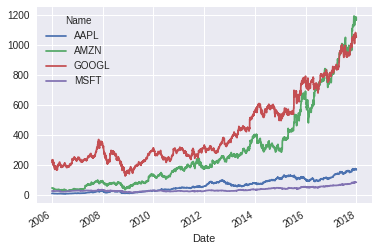

In [0]:
dff_close.plot()
plt.show()

By this graph looks like Google and AMZN  have given more return, but it is an illusion since the starting prices for these values were different we can not really compare these stocks. Lets regularize this series and devide it by first observation

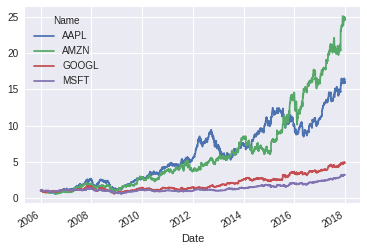

In [0]:
dff_close_norm = dff_close.divide(dff_close.iloc[0,:])
dff_close_norm.plot()
plt.show()

Whoa !!, Now this shows the correct story stoks of **Apple** and **Amazon** have increasd much more than the Google.

We use mostly **statsmodel** and **prophet** library for the time series analysis.

In [0]:
df_aapl = dff_close[['AAPL']].reset_index()
df_aapl.columns = ["ds","y"]


In [0]:
df_aapl["daily_change"] = df_aapl[["y"]].diff()
df_aapl["daily_perc_change"] = df_aapl[["y"]].pct_change()
df_aapl = df_aapl.dropna()

In [93]:
df_aapl.head()

,ds,y,daily_change,daily_perc_change
1,2006-01-04,10.71,0.03,0.002809
2,2006-01-05,10.63,-0.08,-0.007470
3,2006-01-06,10.90,0.27,0.025400
4,2006-01-09,10.86,-0.04,-0.003670
5,2006-01-10,11.55,0.69,0.063536


Lets plot the percentage change

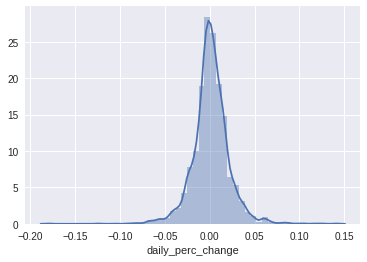

In [94]:
sns.distplot(df_aapl.daily_perc_change)
plt.show()

In [95]:
from statsmodels.stats.weightstats import DescrStatsW
print(DescrStatsW(df_aapl['daily_perc_change'],ddof=len(df_aapl)-1).ttest_mean(value=0, alternative='two-sided'))
print(DescrStatsW(df_aapl['daily_perc_change'],ddof=len(df_aapl)-1).tconfint_mean())


(3.025328898634142, 0.002504578301407265, 3017.0)
(0.00039572880691146617, 0.0018534430815421183)


From 5%  confidance interval we rejected the hypothesis that the mean return is zero 

lets find the rough estimate of the cap of the growth based on overall growth rate

In [96]:
np.mean(df_aapl.daily_perc_change) - 2*np.std(df_aapl.daily_perc_change)

-0.0397108979235351

In [97]:
np.mean(df_aapl.daily_perc_change) + 2*np.std(df_aapl.daily_perc_change)

0.04196006981198868

so most of the time the return remains in the boundry of -4% to +4%

Lets plot the daily change in price and pct change 


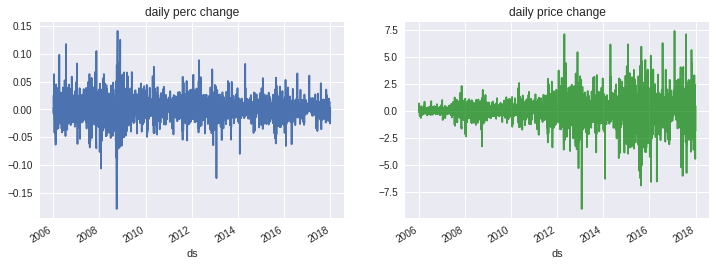

In [98]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
df_aapl.set_index("ds")["daily_perc_change"].plot(ax=ax[0])
df_aapl.set_index("ds")["daily_change"].plot(ax=ax[1], color='g', alpha=0.7)
ax[0].set_title("daily perc change")
ax[1].set_title("daily price change")
plt.show()


By observing these two graphs we can see that both the data does not look stationary(one of the most important concept in time series analysis).
The trend has got removed by the first difference but the variance does not look constant across the whole time line.

1.   In the first graph the variance is fluctuating and during the **2006** and **2009** period it looks higher than previous periods
2.   In the second graph the trend looks reversed initally hte change is not much but later the magnitude of changes increased. 

The opposite trend might be due to change in base price



We have to work on making the series stationary. There are few things we can do is like taking log /square root of the initial series or the of the first difference values

In [0]:
Prophet?